# **Part 1: Data Visualization**

**Author:** Quynh Tran

**Dataset**: train.csv

**Columns**: Demographics, Physical Measures, Sleep Disturbance Scale 

#### **Demographics**: Information about age and sex of participants
* **Basic_Demos-Enroll_Season**: Season of enrollment (string)
> 
Spring, Summer, Fall, Winter
* **Basic_Demos-Age**: Age of participant (float)
* **Basic_Demos-Sex**: Sex of participant (string
> 0(Male), 1(Female))

#### **Physical Measures**: Collection of blood pressure, heart rate, height, weight and waist, and hip measurements 
*Reference*: (https://www.health.harvard.edu/staying-healthy/which-blood-pressure-number-is-important#:~:text=Systolic%20pressure%20reflects%20the%20force,the%20heart%20is%20at%20rest.)

* **Physical-Season**: Season of Participation (string)
> Spring, Summer, Fall, Winter
* **Physical-BMI**: Body Mass Index(kg/m^2) (float)
* **Physical-Height**: Height(in) (float)
* **Physical-Weight**: Weight(lbs) (float)
* **Physical-Waist_Circumference**: Waist Circumference(in) (int)
* **Physical-Diastolic_BP**: Diastolic BP(mmHg) (int)
> Measures pressure in blood vessels when heart is at rest (Harvard Medical School, 2024)
* **Physical-HeartRate**: Heart rate(beats/min) (int)
* **Physical-Systolic_BP**: Systolic BP(mmHg) (int)
> Measures pressure that is produced by the heart when it pumps blood out to the body (Harvard Medical School, 2024)

#### **Sleep Disturbance Scale**: Scale to cateforize sleep disorders in children
* **SDS-Season**: Season of participation (string)
> Spring, Summer, Fall, Winter
* **SDS-SDS_Total_Raw**: Total Raw Score (int)
* **SDS-SDS_Total_T**: Total T-Score (int)

## 1. Import all necessary visualization libraries and load into dataset

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [17]:
data_filepath = r"C:\Users\quynh\OneDrive\Documents\DSA 330\Final Project\train (1).csv"
data = pd.read_csv(data_filepath)

> Print out first few rows to confirm dataset successfully loaded in 

In [23]:
print(data.head())

         id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT

In [104]:
#Prints out the total number of rows 
print(data.shape)

(3960, 82)


## 2. Narrowing Dataset Down to the 3 Categories 

In [78]:
demographics = data[['Basic_Demos-Enroll_Season','Basic_Demos-Age','Basic_Demos-Sex']]
print(demographics.head())

  Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex
0                      Fall                5                0
1                    Summer                9                0
2                    Summer               10                1
3                    Winter                9                0
4                    Spring               18                1


In [80]:
physical_measures = data[['Physical-Season','Physical-BMI','Physical-Height','Physical-Weight','Physical-Waist_Circumference','Physical-Diastolic_BP','Physical-HeartRate','Physical-Systolic_BP']]
print(physical_measures.head())

  Physical-Season  Physical-BMI  Physical-Height  Physical-Weight  \
0            Fall     16.877316             46.0             50.8   
1            Fall     14.035590             48.0             46.0   
2            Fall     16.648696             56.5             75.6   
3          Summer     18.292347             56.0             81.6   
4             NaN           NaN              NaN              NaN   

   Physical-Waist_Circumference  Physical-Diastolic_BP  Physical-HeartRate  \
0                           NaN                    NaN                 NaN   
1                          22.0                   75.0                70.0   
2                           NaN                   65.0                94.0   
3                           NaN                   60.0                97.0   
4                           NaN                    NaN                 NaN   

   Physical-Systolic_BP  
0                   NaN  
1                 122.0  
2                 117.0  
3           

In [83]:
sds = data[['SDS-Season','SDS-SDS_Total_Raw','SDS-SDS_Total_T']]
print(sds.head())

  SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T
0        NaN                NaN              NaN
1       Fall               46.0             64.0
2       Fall               38.0             54.0
3     Summer               31.0             45.0
4        NaN                NaN              NaN


## 3. Understanding Each Category - Exploratory Data Analysis 

> ### a. Univariate Analysis - Descriptive Statistics

>> **Categorical Variables**:
>> * Basic_Demos-Enroll_Season
>> * Basic_Demos-Sex
>> * Physical-Season
>> * SDS-Season

>> **Numerical Variables**:
>> * Basic_Demos-Age
>> * Physical-BMI
>> * Physical-Height
>> * Physical-Weight
>> * Physical-Waist_Circumference
>> * Physical-Diastolic_BP
>> * Physical-HeartRate
>> * Physical-Systolic_BP
>> * SDS-SDS_Total_Raw
>> * SDS-SDS_Total_T


**Null Values**

In [96]:
print(demographics.isnull().sum())

Basic_Demos-Enroll_Season    0
Basic_Demos-Age              0
Basic_Demos-Sex              0
dtype: int64


In [98]:
print(physical_measures.isnull().sum())

Physical-Season                  650
Physical-BMI                     938
Physical-Height                  933
Physical-Weight                  884
Physical-Waist_Circumference    3062
Physical-Diastolic_BP           1006
Physical-HeartRate               993
Physical-Systolic_BP            1006
dtype: int64


In [106]:
print(sds.isnull().sum())

SDS-Season           1342
SDS-SDS_Total_Raw    1351
SDS-SDS_Total_T      1354
dtype: int64


**Central Values**

In [109]:
print(demographics.describe(include='all'))

       Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex
count                       3960      3960.000000      3960.000000
unique                         4              NaN              NaN
top                       Spring              NaN              NaN
freq                        1127              NaN              NaN
mean                         NaN        10.433586         0.372727
std                          NaN         3.574648         0.483591
min                          NaN         5.000000         0.000000
25%                          NaN         8.000000         0.000000
50%                          NaN        10.000000         0.000000
75%                          NaN        13.000000         1.000000
max                          NaN        22.000000         1.000000


In [112]:
print(physical_measures.describe(include='all'))

       Physical-Season  Physical-BMI  Physical-Height  Physical-Weight  \
count             3310   3022.000000      3027.000000      3076.000000   
unique               4           NaN              NaN              NaN   
top             Spring           NaN              NaN              NaN   
freq               929           NaN              NaN              NaN   
mean               NaN     19.331929        55.946713        89.038615   
std                NaN      5.113934         7.473764        44.569040   
min                NaN      0.000000        33.000000         0.000000   
25%                NaN     15.869350        50.000000        57.200000   
50%                NaN     17.937682        55.000000        77.000000   
75%                NaN     21.571244        62.000000       113.800000   
max                NaN     59.132048        78.500000       315.000000   

        Physical-Waist_Circumference  Physical-Diastolic_BP  \
count                     898.000000            

In [114]:
print(sds.describe(include='all'))

       SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T
count        2618        2609.000000      2606.000000
unique          4                NaN              NaN
top        Spring                NaN              NaN
freq          712                NaN              NaN
mean          NaN          41.088923        57.763622
std           NaN          10.427433        13.196091
min           NaN          17.000000        38.000000
25%           NaN          33.000000        47.000000
50%           NaN          39.000000        55.000000
75%           NaN          46.000000        64.000000
max           NaN          96.000000       100.000000


**Visualization - Categorical**

> **Pie Charts**

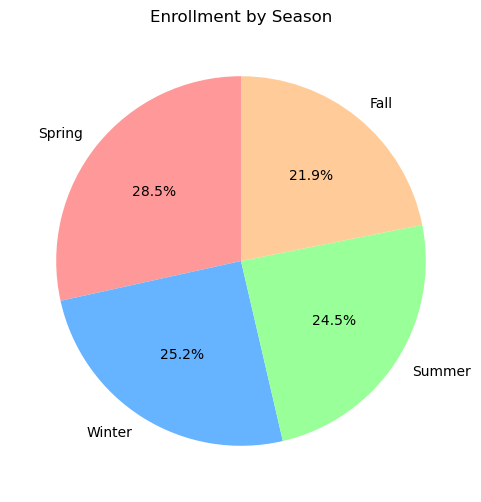

In [125]:
##Enrollment Season Pie Chart 
demos_season_counts = demographics['Basic_Demos-Enroll_Season'].value_counts()
plt.figure(figsize=(6, 6))
demos_season_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Enrollment by Season")
plt.ylabel("")  
plt.show()

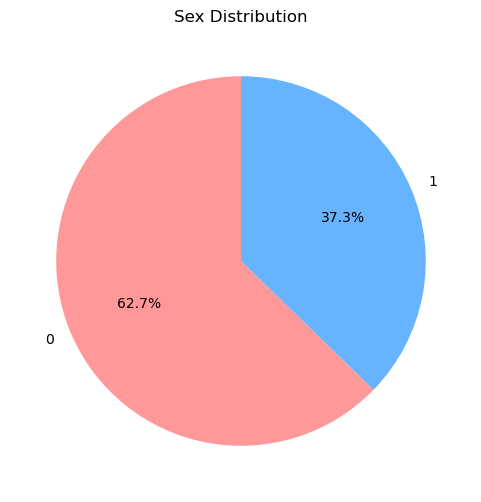

In [140]:
##Participant Sex Pie Chart
demos_sex_counts = demographics['Basic_Demos-Sex'].value_counts()
plt.figure(figsize=(6, 6))
demos_sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Sex Distribution")
plt.ylabel("")
plt.show()

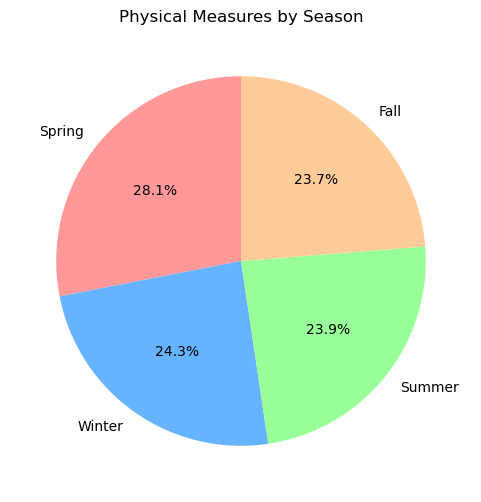

In [144]:
##Physical Measures by Season Pie Chart
physical_seasons = physical_measures['Physical-Season'].value_counts()
plt.figure(figsize=(6, 6))
physical_seasons.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Physical Measures by Season")
plt.ylabel("")
plt.show()

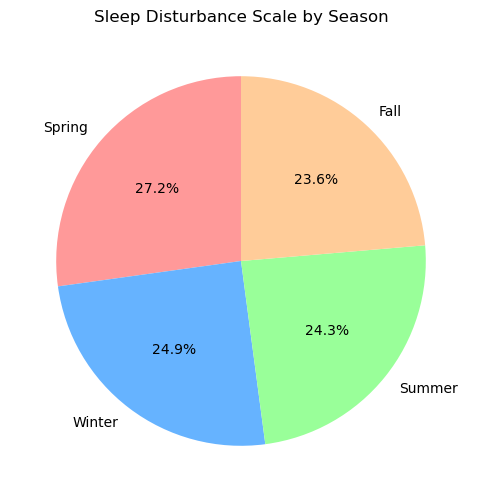

In [142]:
##Sleep Disturbance Scale by Season Pie Chart
sds_seasons = sds['SDS-Season'].value_counts()
plt.figure(figsize=(6, 6))
sds_seasons.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Sleep Disturbance Scale by Season")
plt.ylabel("")
plt.show()

**Visualization - Numerical**

> **Histograms**

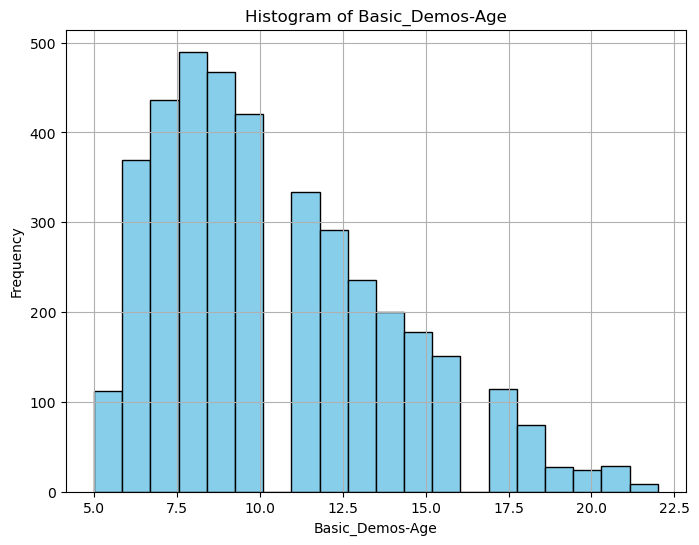

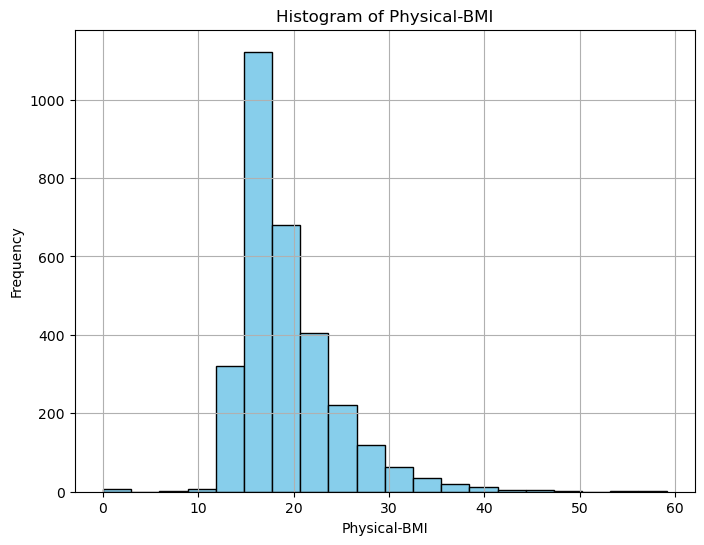

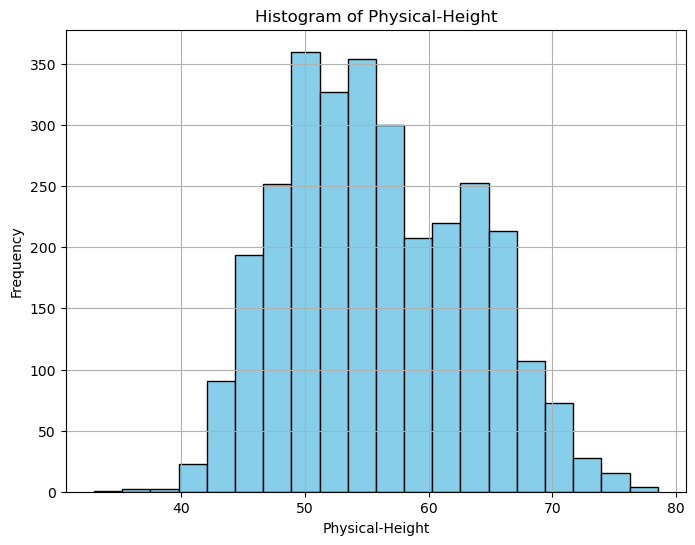

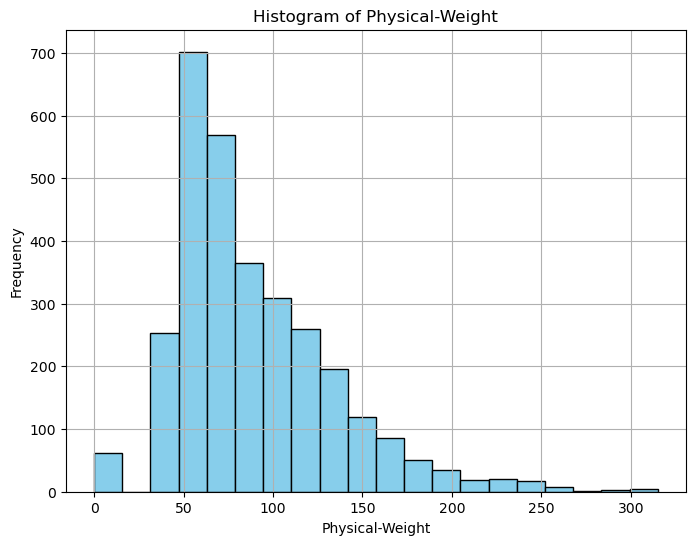

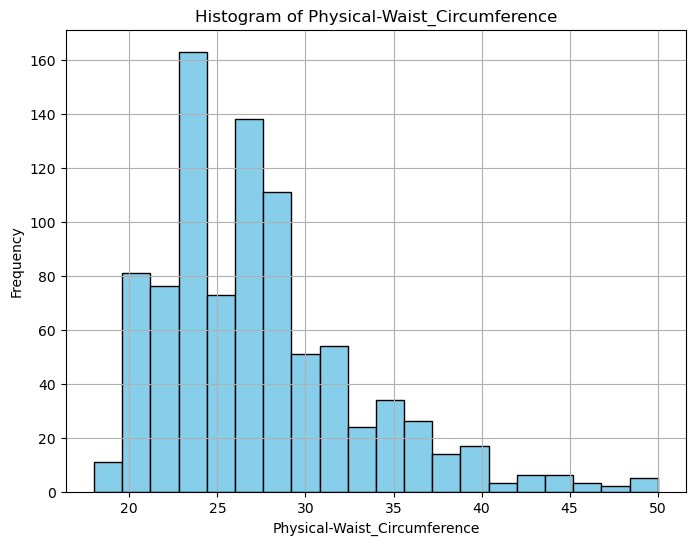

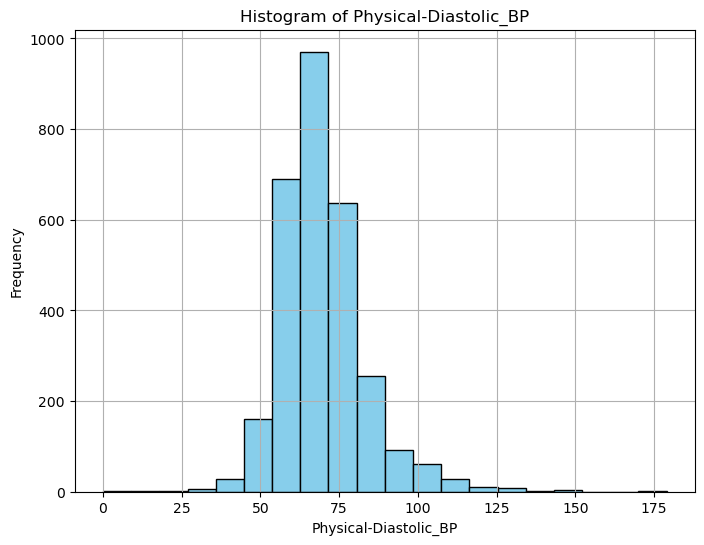

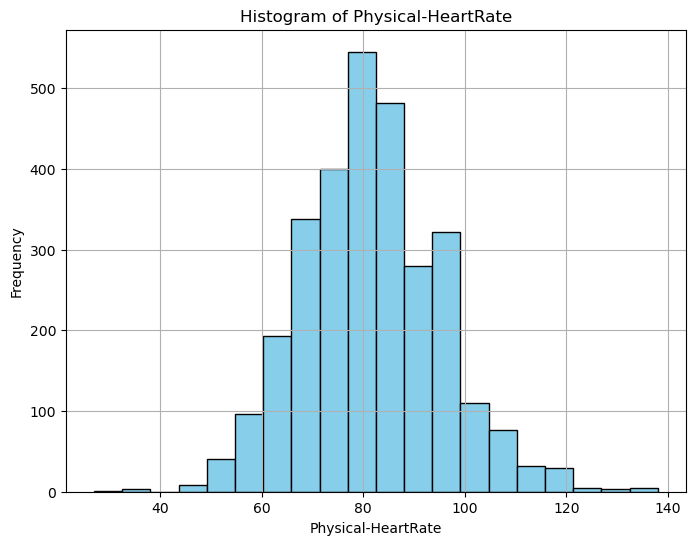

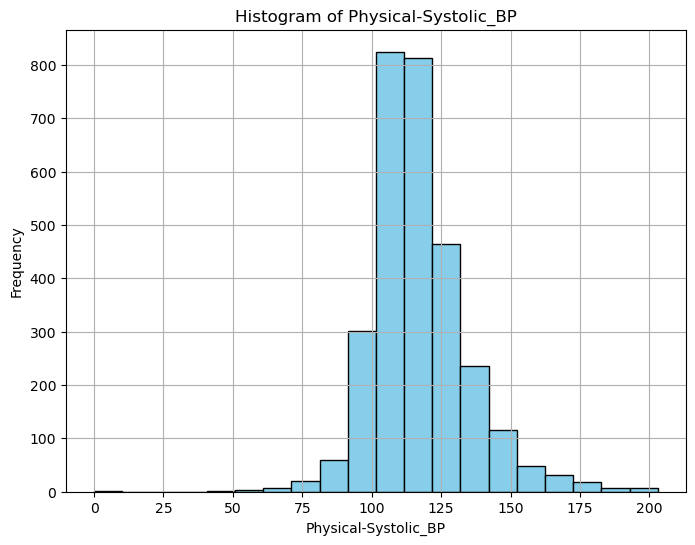

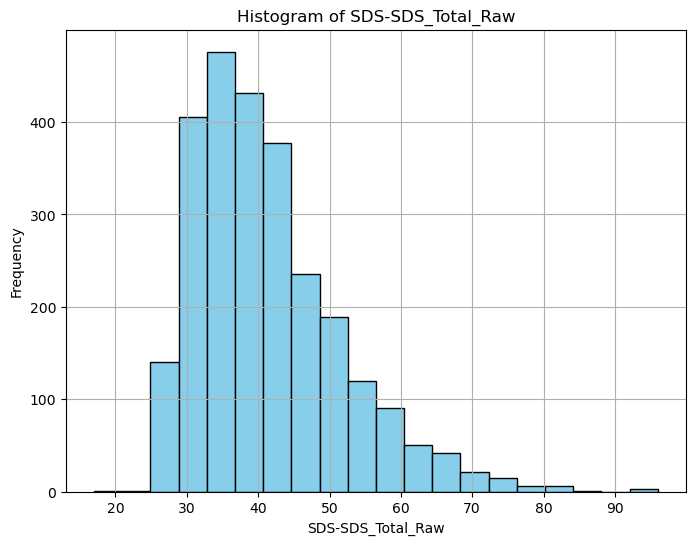

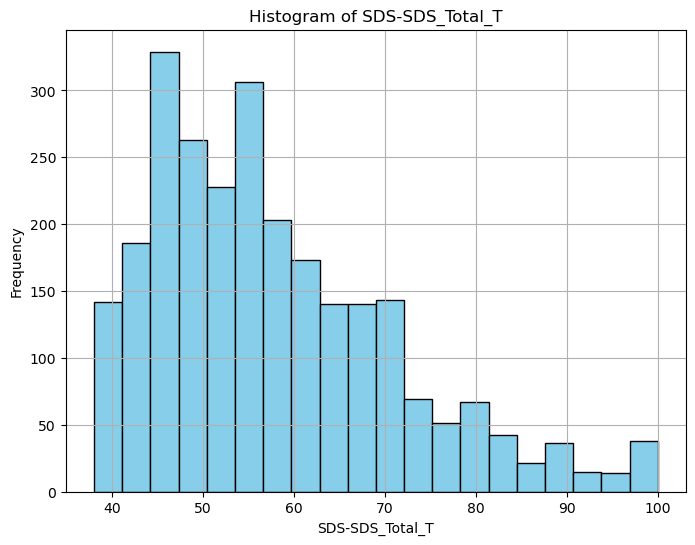

In [214]:
# Histograms for all numeric variables 
numerical_columns = [
    'Basic_Demos-Age', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 
    'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 
    'Physical-HeartRate', 'Physical-Systolic_BP', 'SDS-SDS_Total_Raw','SDS-SDS_Total_T'
]
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    data[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

>**Box PLots**

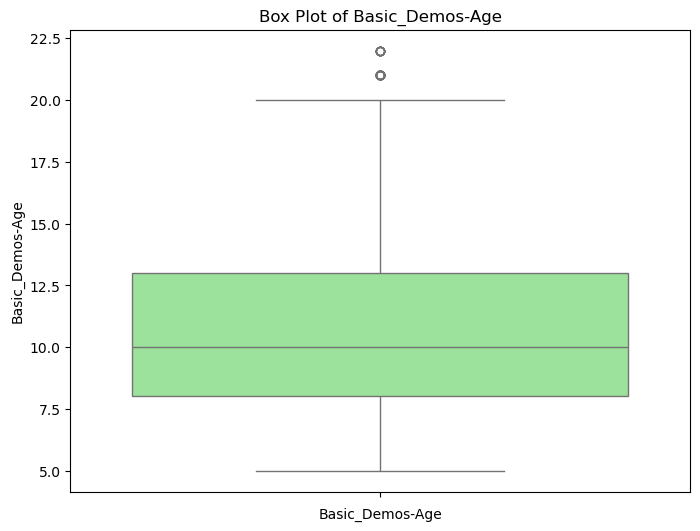

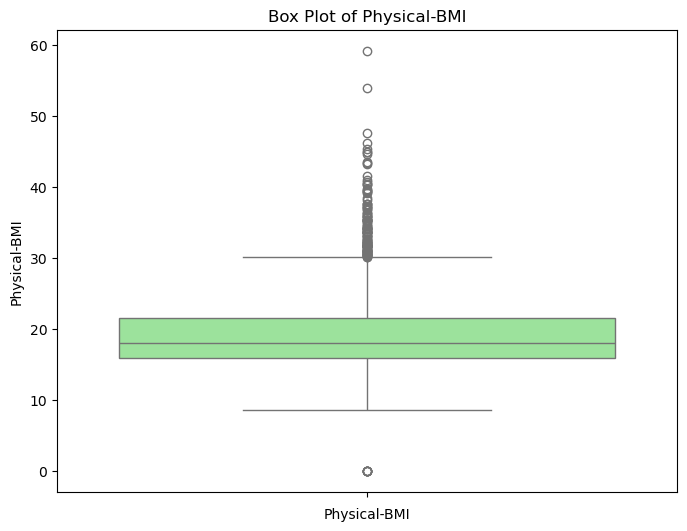

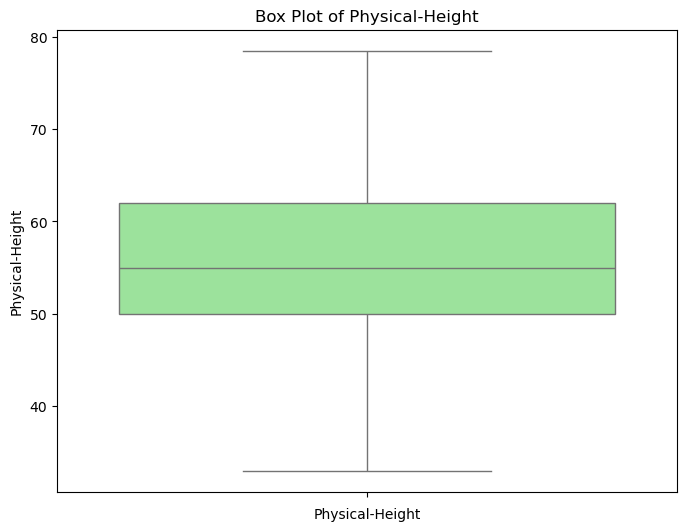

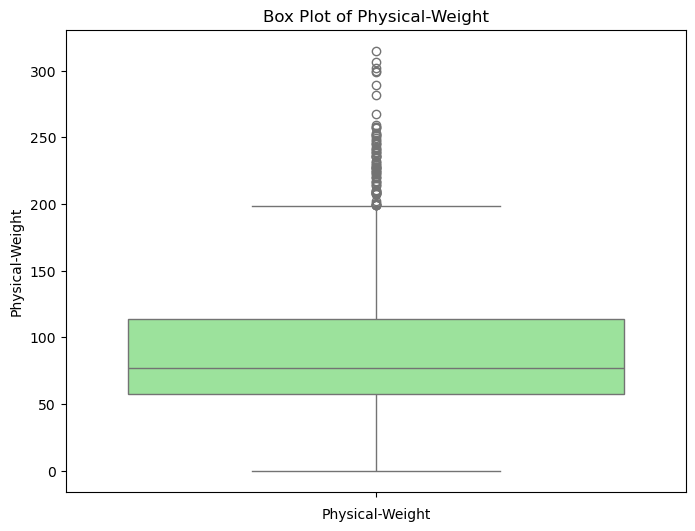

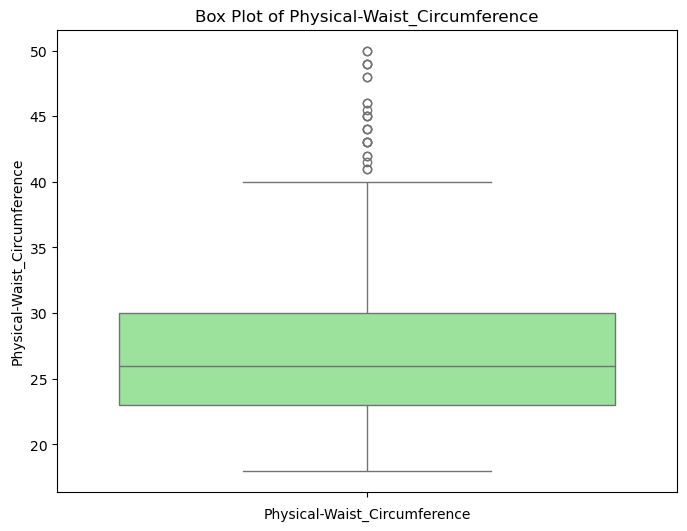

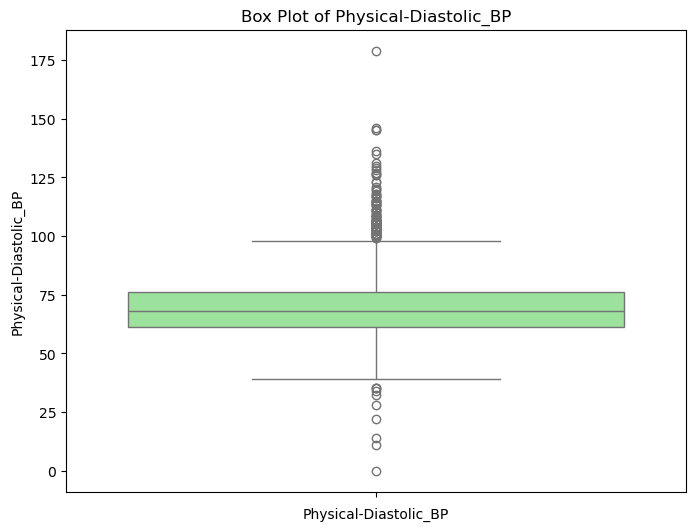

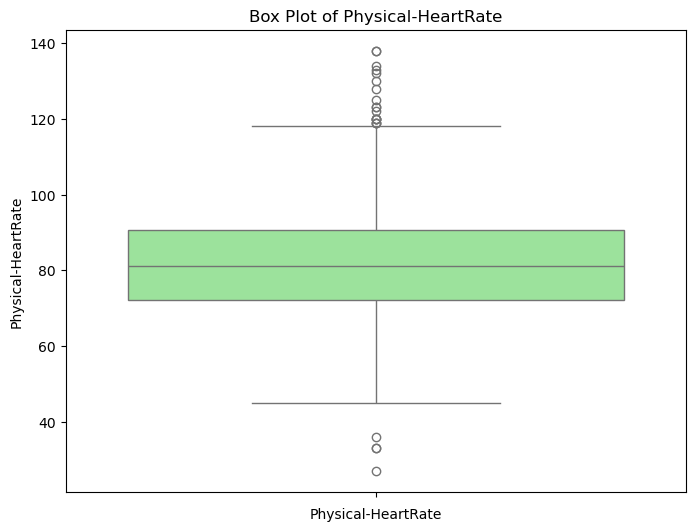

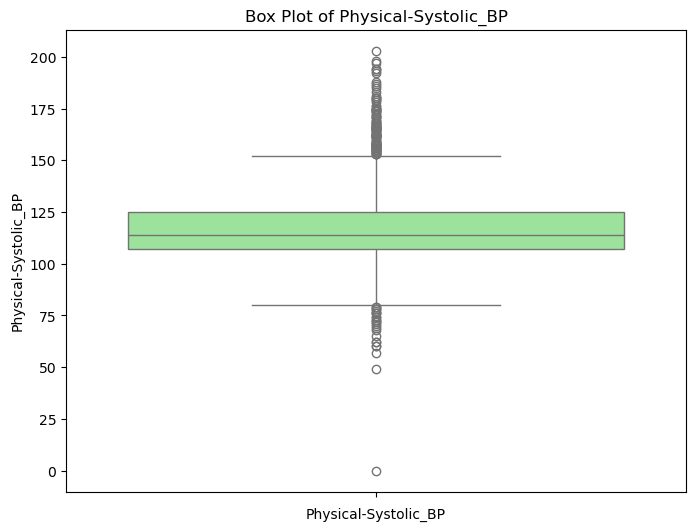

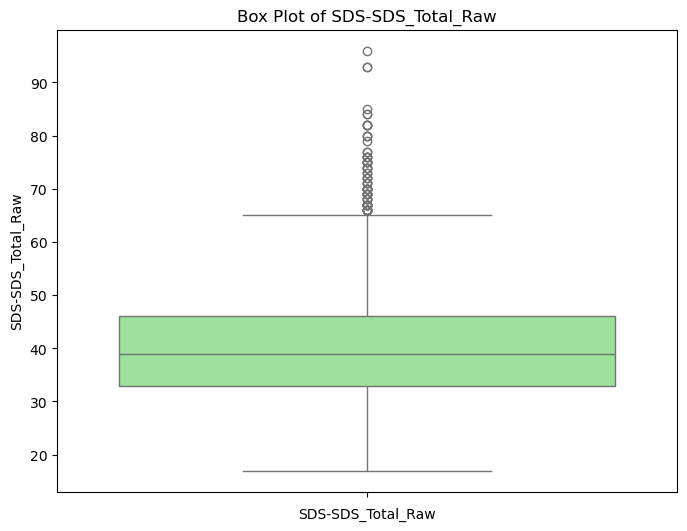

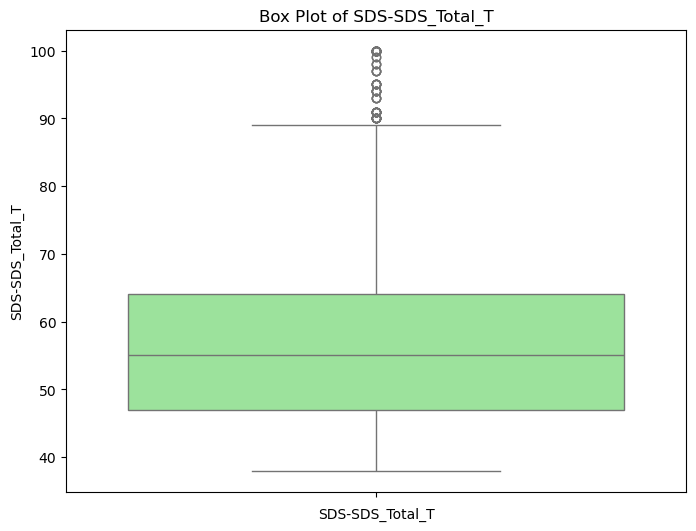

In [216]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data[col], color='lightgreen')
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()

 >**Kernal Density Estimate Plot (KDE)**

C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\95264731.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='purple')


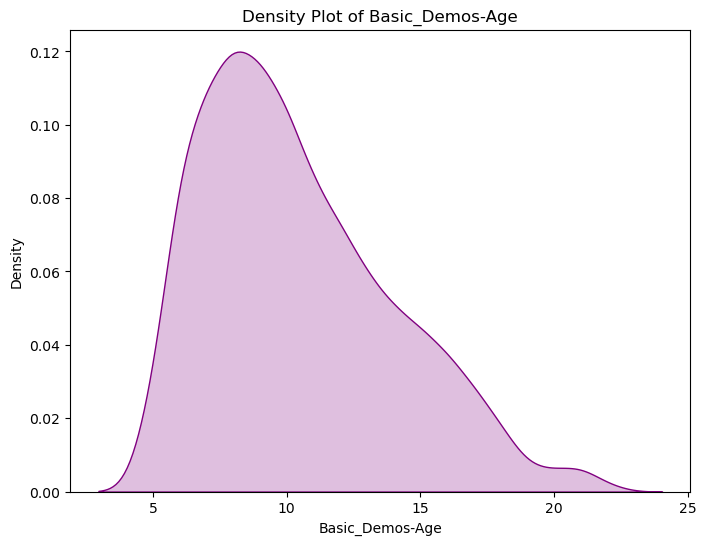

C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\95264731.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='purple')


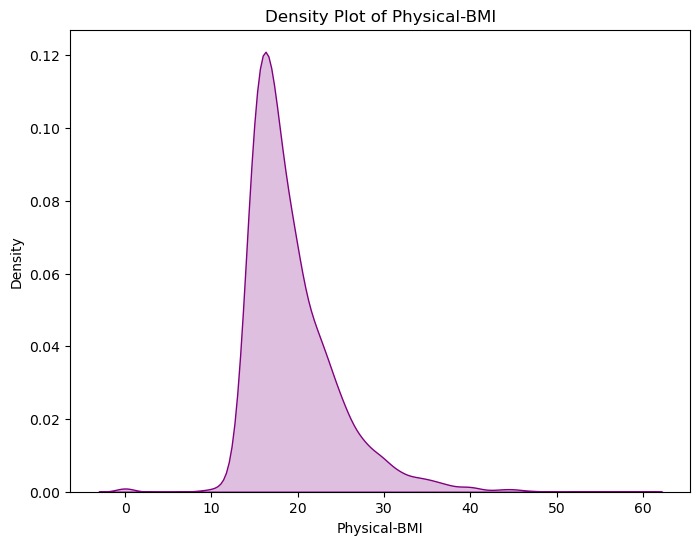

C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\95264731.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='purple')


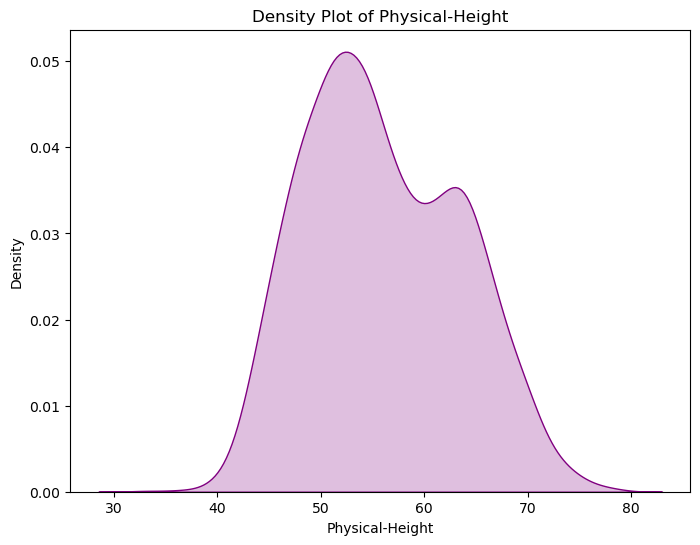

C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\95264731.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='purple')


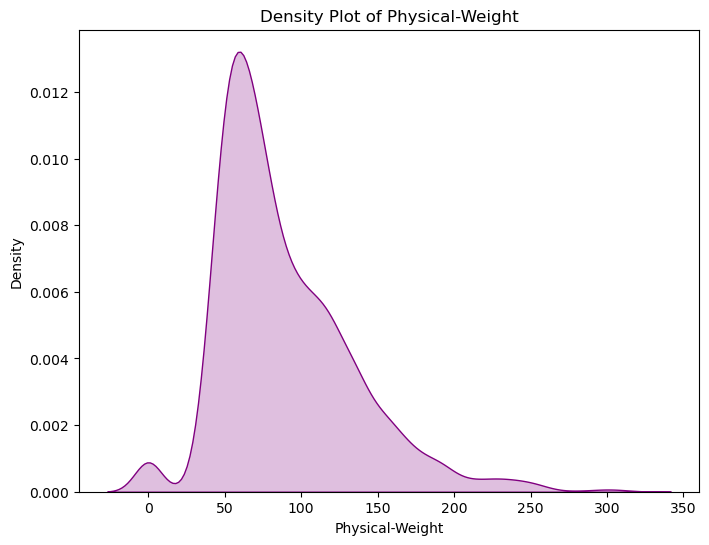

C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\95264731.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='purple')


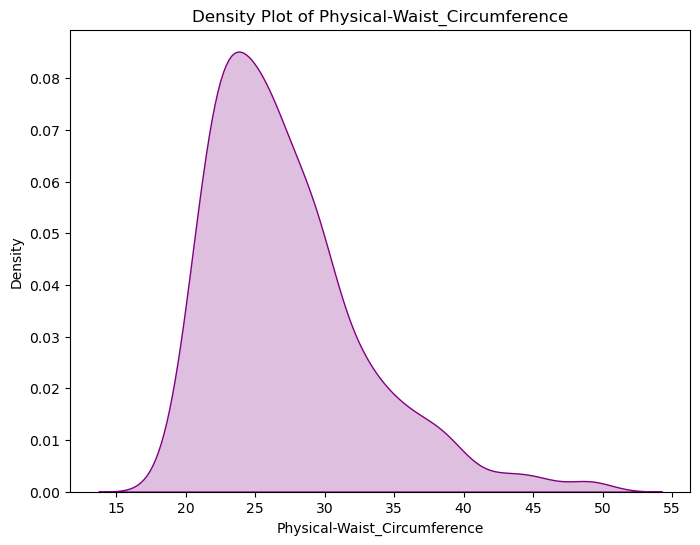

C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\95264731.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='purple')


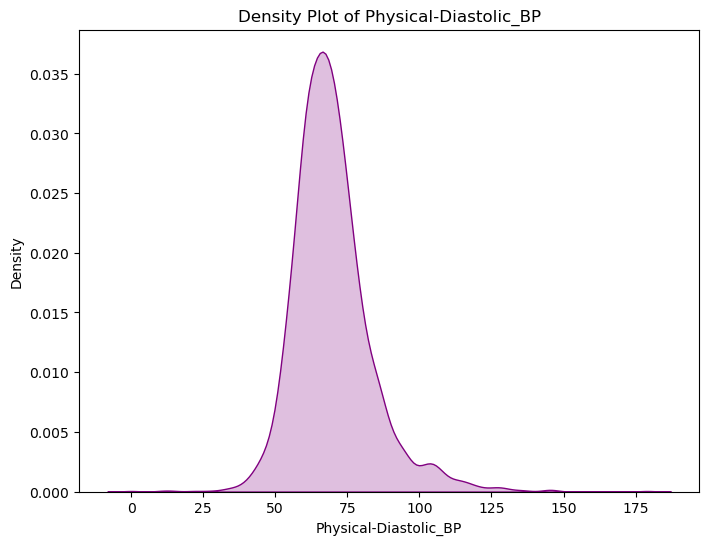

C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\95264731.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='purple')


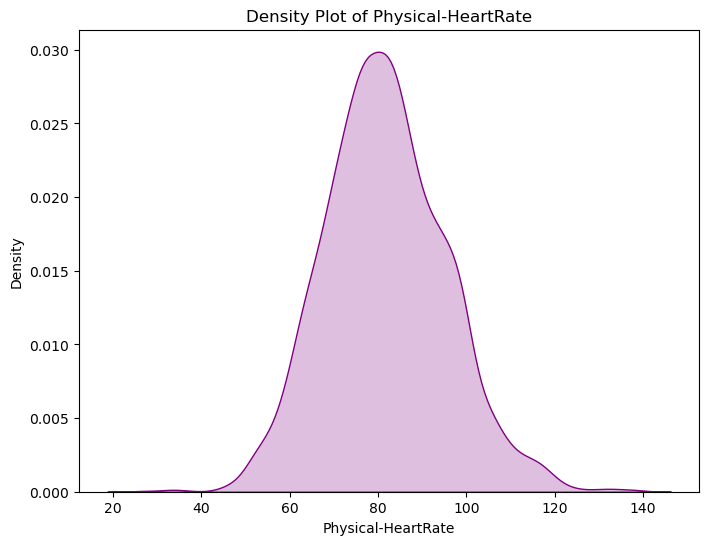

C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\95264731.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='purple')


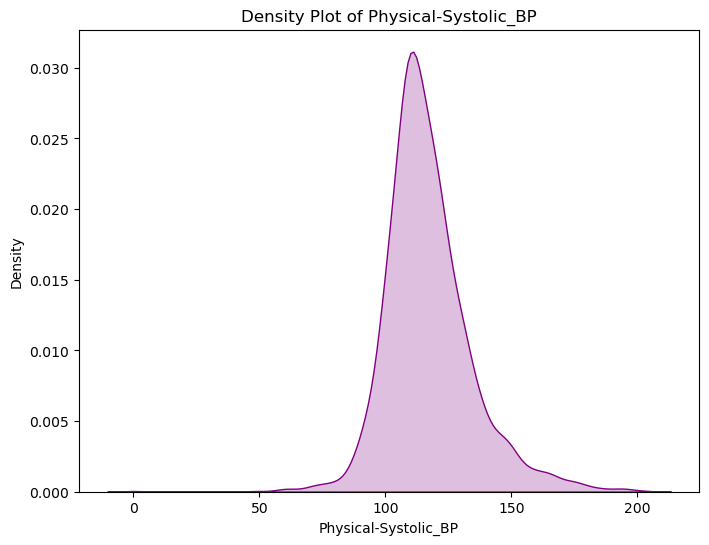

C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\95264731.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='purple')


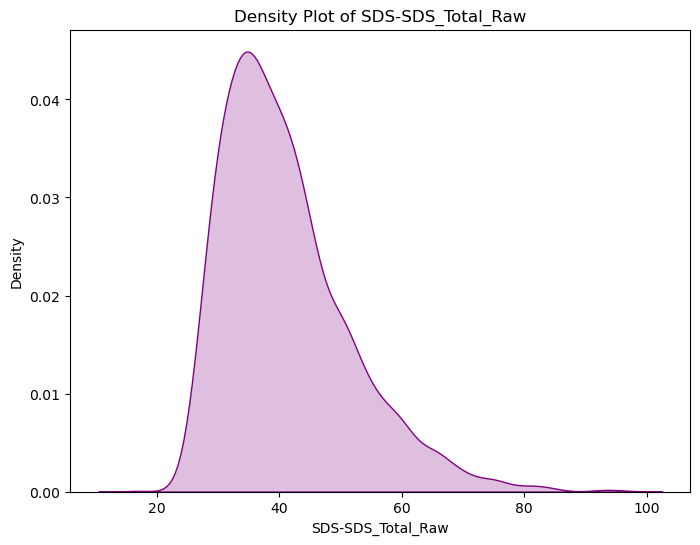

C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\95264731.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='purple')


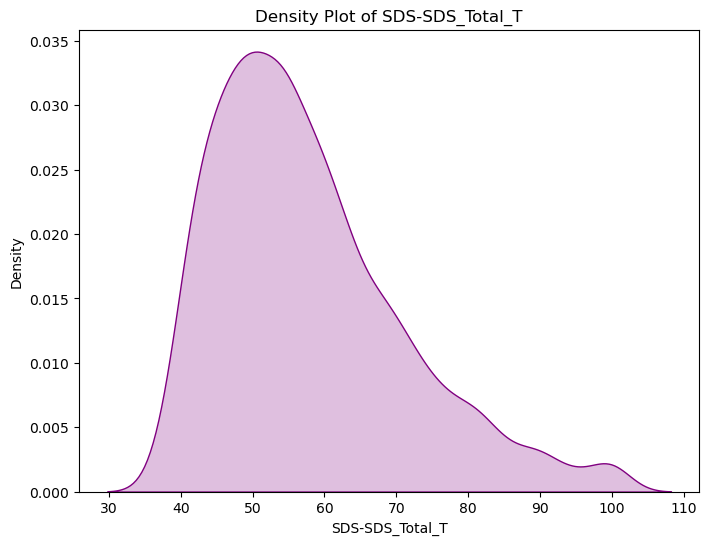

In [218]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data[col], shade=True, color='purple')
    plt.title(f"Density Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

> ### b. Bivariate Analysis and Visualization

Now, we'll compare variables to each other to see relationships and trends
* **Age**
> * Age vs. Sex
> * Age vs. BMI
> * Age vs. Height
> * Age vs. Blood Pressure
> * Age vs. Enrollment Season 

C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\269875829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Basic_Demos-Sex', y='Basic_Demos-Age', palette="Set2")


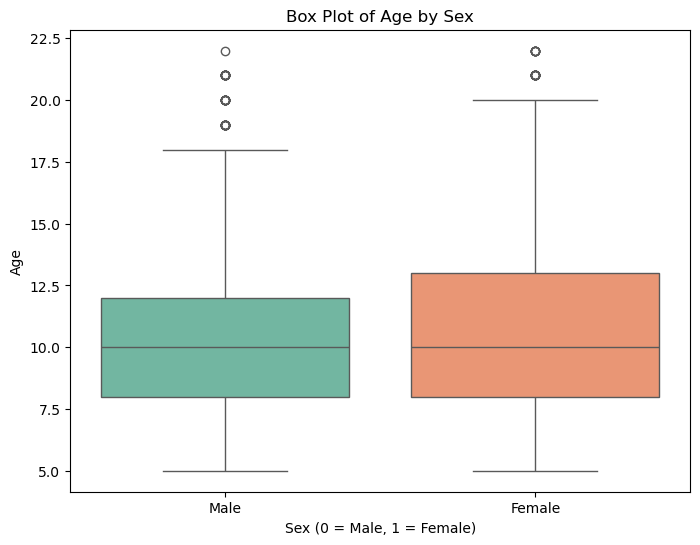

In [168]:
# Box Plots for Age by Sex 
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Basic_Demos-Sex', y='Basic_Demos-Age', palette="Set2")
plt.title("Box Plot of Age by Sex")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Age")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])  
plt.show()

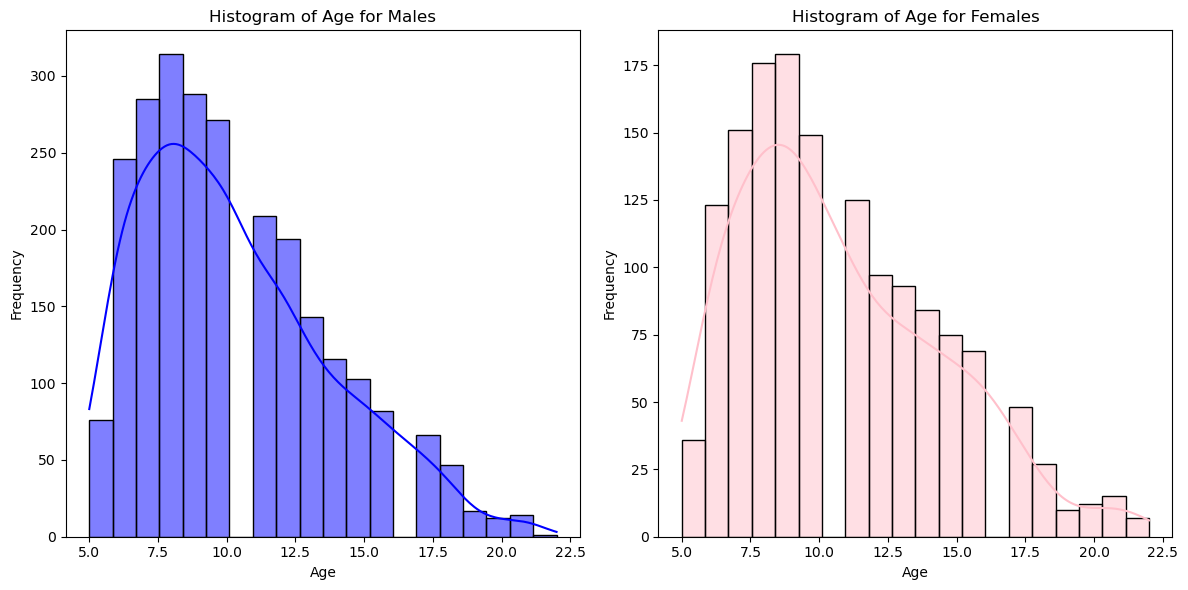

In [172]:
## Histograms for Age by Sex
plt.figure(figsize=(12, 6))

# Histogram for Males
plt.subplot(1, 2, 1)
sns.histplot(data[data['Basic_Demos-Sex'] == 0], x='Basic_Demos-Age', bins=20, kde=True, color='blue')
plt.title("Histogram of Age for Males")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Histogram for Females
plt.subplot(1, 2, 2)
sns.histplot(data[data['Basic_Demos-Sex'] == 1], x='Basic_Demos-Age', bins=20, kde=True, color='pink')
plt.title("Histogram of Age for Females")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\3764030103.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Age_Group', y='Physical-BMI', palette="Set2")


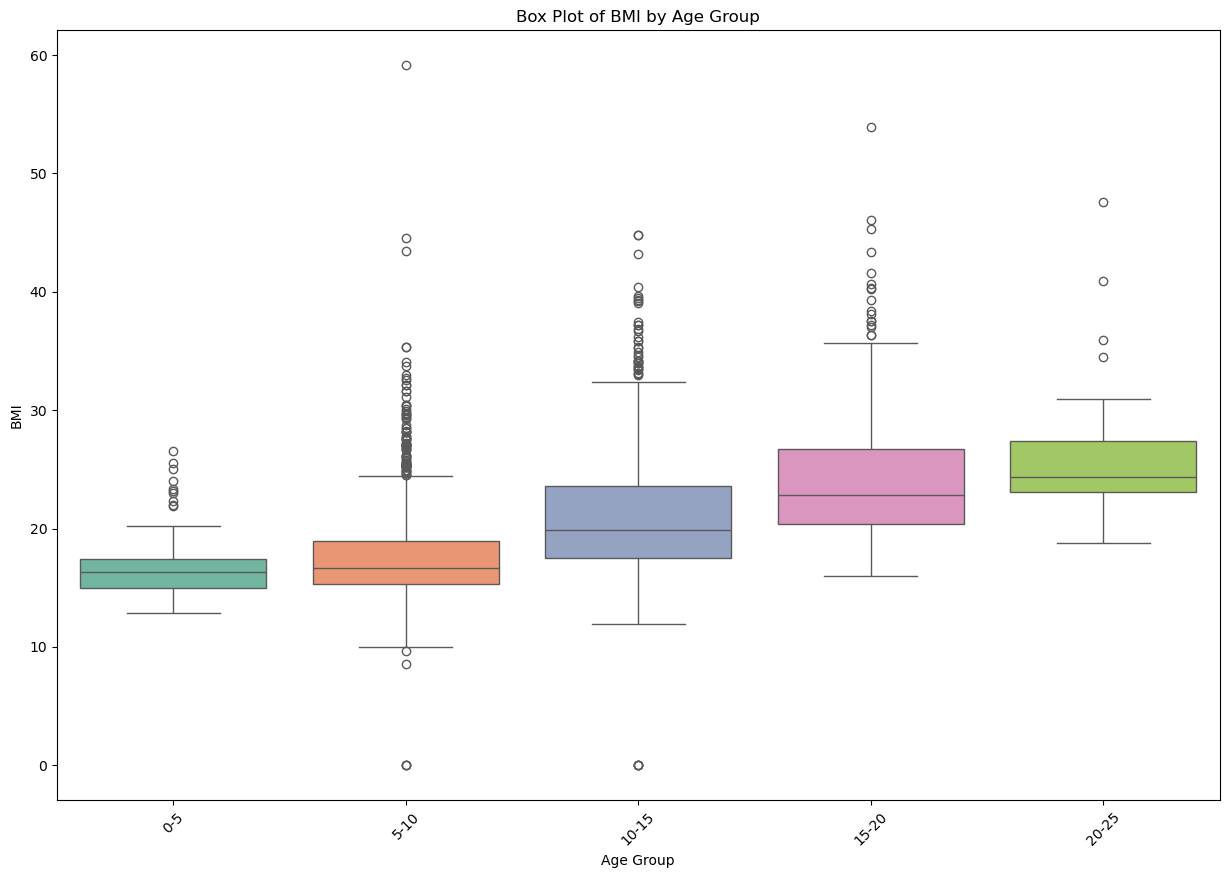

In [180]:
# Boxplots for Age vs. BMI
# Different age groups
bins = [0,5,10,15,20,25]
labels = ['0-5','5-10','10-15','15-20','20-25']
data['Age_Group'] = pd.cut(data['Basic_Demos-Age'], bins=bins, labels=labels)

plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='Age_Group', y='Physical-BMI', palette="Set2")
plt.title("Box Plot of BMI by Age Group")
plt.xlabel("Age Group")
plt.ylabel("BMI")
plt.xticks(rotation=45)
plt.show()

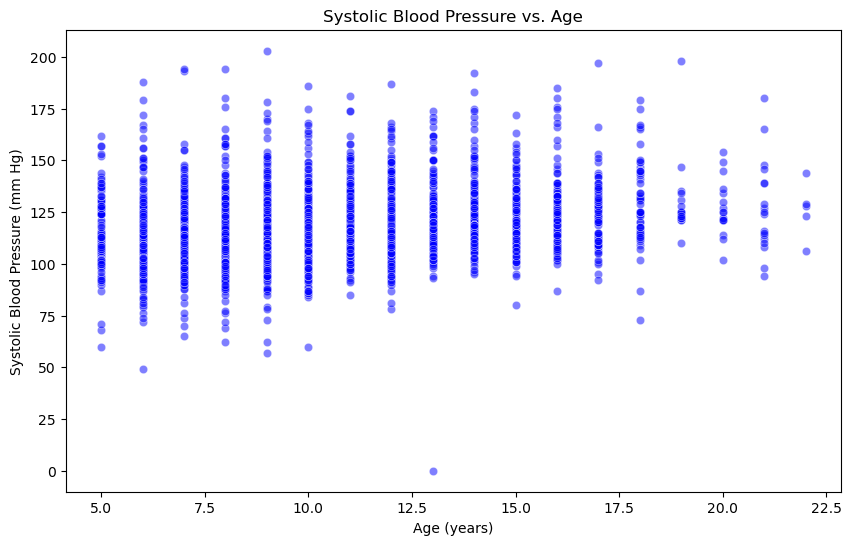

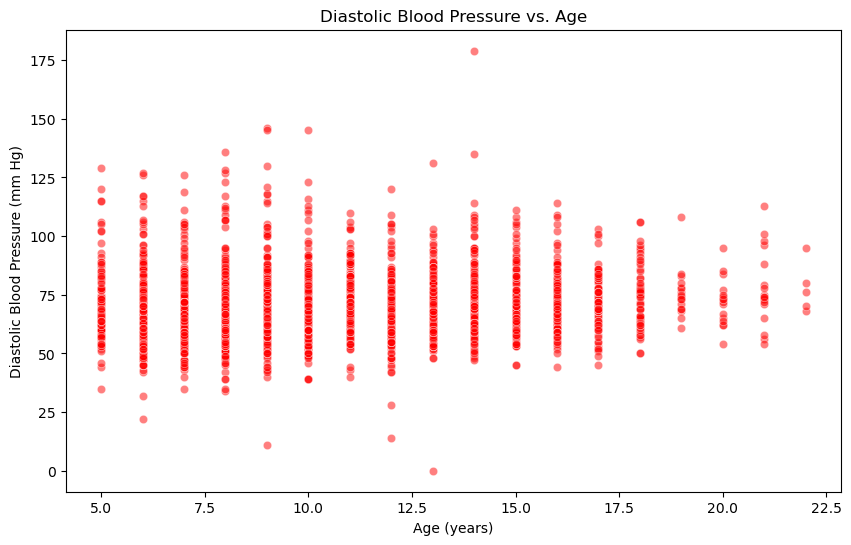

In [200]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Basic_Demos-Age', y='Physical-Systolic_BP', alpha=0.5, color='blue')
plt.title("Systolic Blood Pressure vs. Age")
plt.xlabel("Age (years)")
plt.ylabel("Systolic Blood Pressure (mm Hg)")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Basic_Demos-Age', y='Physical-Diastolic_BP', alpha=0.5, color='red')
plt.title("Diastolic Blood Pressure vs. Age")
plt.xlabel("Age (years)")
plt.ylabel("Diastolic Blood Pressure (mm Hg)")
plt.show()

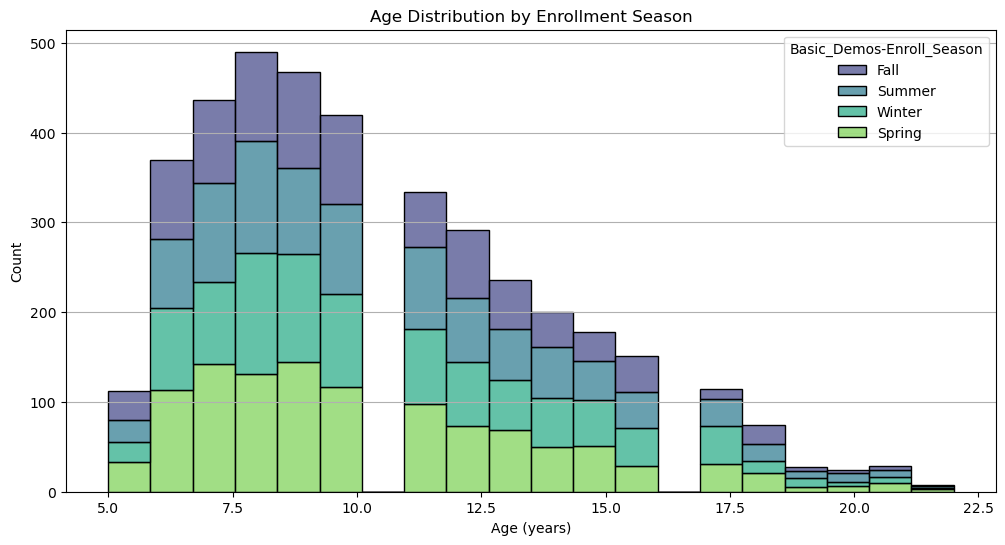

In [204]:
# Histogram for Age by Enrollment Season
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Basic_Demos-Age', hue='Basic_Demos-Enroll_Season', bins=20, multiple='stack', alpha=0.7, palette='viridis')

plt.title('Age Distribution by Enrollment Season')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.grid(axis='y')

plt.show()

* **Sex**
> * Sex vs. BMI
> * Sex vs. Blood Pressure

C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\2858772142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Basic_Demos-Sex', y='Physical-BMI', palette='pastel')


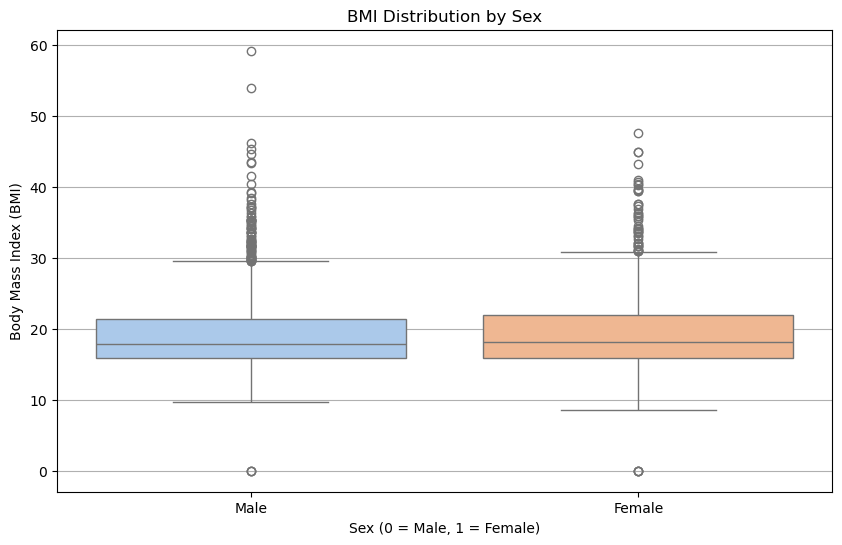

In [207]:
# Box plot for BMI by Sex
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Basic_Demos-Sex', y='Physical-BMI', palette='pastel')

plt.title('BMI Distribution by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Body Mass Index (BMI)')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])  
plt.grid(axis='y')

plt.show()

C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\1542979564.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Basic_Demos-Sex', y='Physical-Diastolic_BP', palette='pastel')
C:\Users\quynh\AppData\Local\Temp\ipykernel_10432\1542979564.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Basic_Demos-Sex', y='Physical-Systolic_BP', palette='pastel')


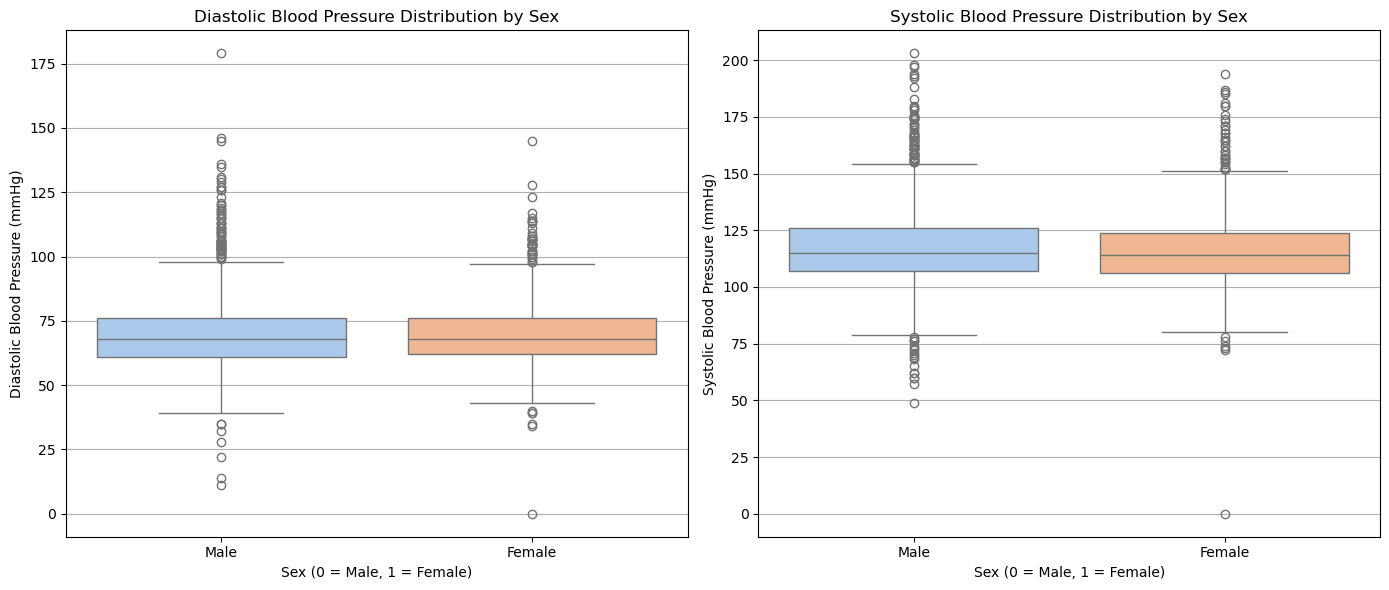

In [211]:
# Box plot for Blood Pressure by Sex
plt.figure(figsize=(14, 6))

# Box plot for Diastolic Blood Pressure
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(data=data, x='Basic_Demos-Sex', y='Physical-Diastolic_BP', palette='pastel')
plt.title('Diastolic Blood Pressure Distribution by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])  
plt.grid(axis='y')

# Box plot for Systolic Blood Pressure
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(data=data, x='Basic_Demos-Sex', y='Physical-Systolic_BP', palette='pastel')
plt.title('Systolic Blood Pressure Distribution by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])  
plt.grid(axis='y')

plt.tight_layout()
plt.show()

* **Sleep Disturbance Scale**
> * SDS-SDS_Total_Raw and Physical-BMI
> * SDS-SDS_Total_Raw and Physical-Height
> * SDS-SDS_Total_Raw and Physical-Weight
> * SDS-SDS_Total_T and Basic_Demos-Age
> * SDS-SDS_Total_T and Physical-HeartRate
> * SDS-SDS_Total_Raw and Physical-Diastolic_BP
> * SDS-SDS_Total_Raw and Physical-Systolic_BP

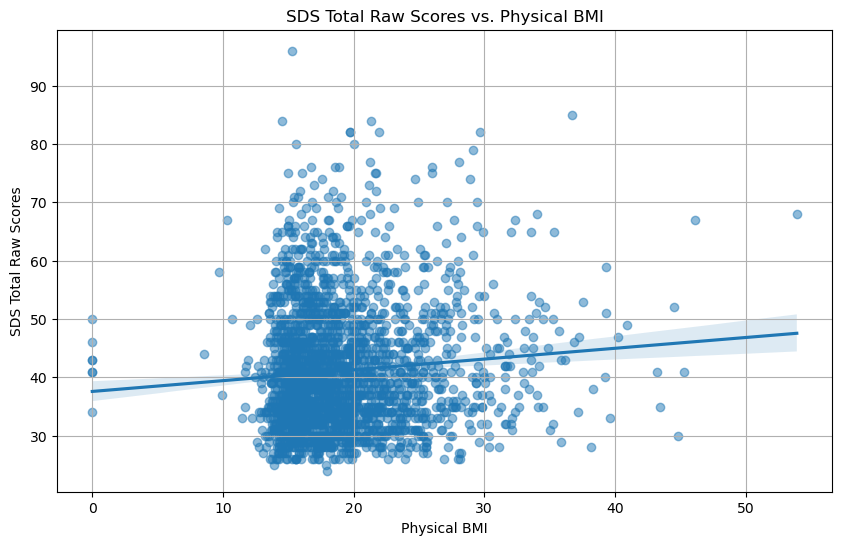

In [224]:
#Scatter Plot for SDS-SDS_Total_Raw and Physical-BMI
plt.figure(figsize=(10, 6))
sns.regplot(x='Physical-BMI', y='SDS-SDS_Total_Raw', data=data, scatter_kws={'alpha':0.5})
plt.title('SDS Total Raw Scores vs. Physical BMI')
plt.xlabel('Physical BMI')
plt.ylabel('SDS Total Raw Scores')
plt.grid()
plt.show()

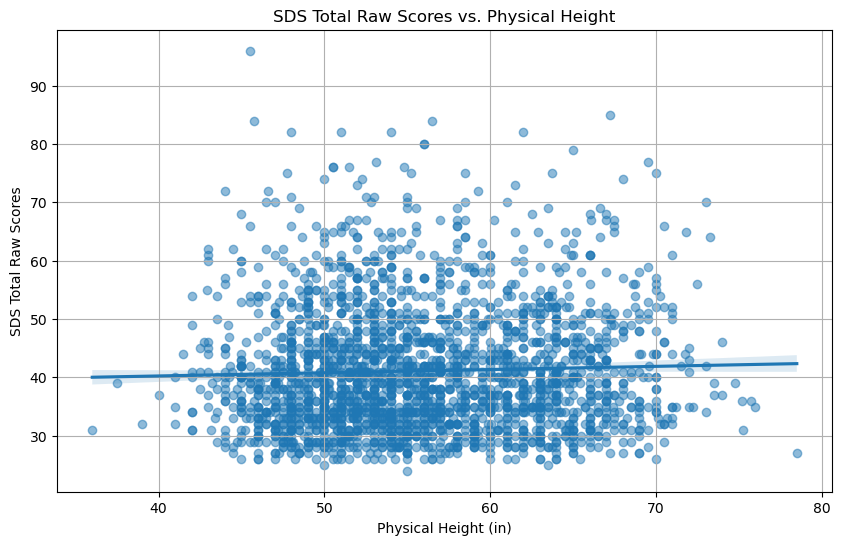

In [230]:
#Scatter Plot for SDS-SDS_Total_Raw and Physical-Height
plt.figure(figsize=(10, 6))
sns.regplot(x='Physical-Height', y='SDS-SDS_Total_Raw', data=data, scatter_kws={'alpha':0.5})
plt.title('SDS Total Raw Scores vs. Physical Height')
plt.xlabel('Physical Height (in)')
plt.ylabel('SDS Total Raw Scores')
plt.grid()
plt.show()

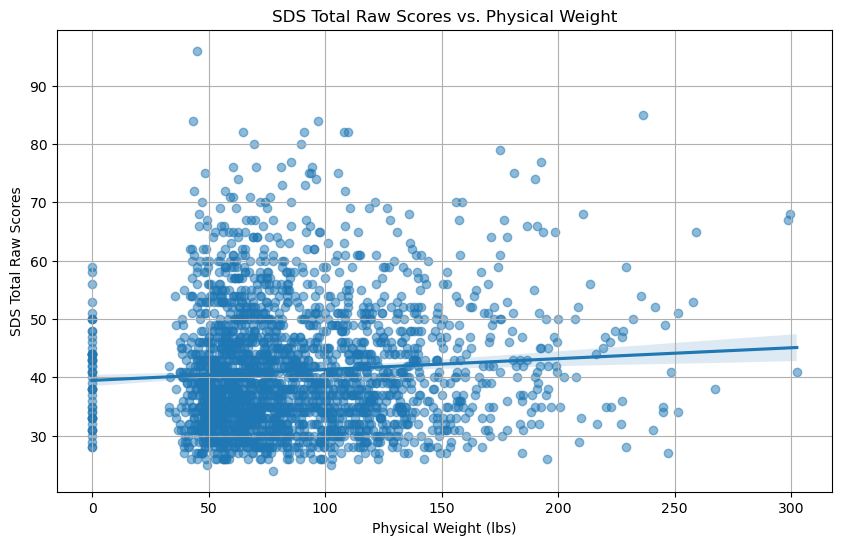

In [232]:
#Scatter Plot for SDS-SDS_Total_Raw and Physical-Weight
plt.figure(figsize=(10, 6))
sns.regplot(x='Physical-Weight', y='SDS-SDS_Total_Raw', data=data, scatter_kws={'alpha':0.5})
plt.title('SDS Total Raw Scores vs. Physical Weight')
plt.xlabel('Physical Weight (lbs)')
plt.ylabel('SDS Total Raw Scores')
plt.grid()
plt.show()